In [1]:
!pip install ultralytics  # YOLOv5
!pip install opencv-python numpy matplotlib
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
#Downloading an image dataset from Berkley Driving Dataset Open Record - 100K images
!mkdir dataset
!wget -P dataset http://128.32.162.150/bdd100k/bdd100k_images_10k.zip
!unzip dataset/bdd100k_images_10k.zip -d dataset/


mkdir: cannot create directory ‘dataset’: File exists
--2025-03-15 13:50:56--  http://128.32.162.150/bdd100k/bdd100k_images_10k.zip
Connecting to 128.32.162.150:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1103797977 (1.0G) [application/zip]
Saving to: ‘dataset/bdd100k_images_10k.zip.1’

bdd100k_images_10k.  23%[===>                ] 244.80M  20.6MB/s    eta 45s    ^C
Archive:  dataset/bdd100k_images_10k.zip
replace dataset/10k/train/3ccab566-c80e0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
image_path = "dataset/10k/val/0000001.jpg"  # Adjust the filename if needed

In [14]:
import os

image_dir = "dataset/10k/val/"
images = os.listdir(image_dir)

print("Sample images:", images[:5])  # Show first 5 image names


Sample images: ['84d7e0cf-95b24c51.jpg', '81a749be-2291617d.jpg', 'a6f36e54-00000000.jpg', '8fd046f2-e41d0001.jpg', '9db1088d-30de9c1b.jpg']


In [15]:
import cv2

image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Check file path!")
else:
    print("Image loaded successfully!")


Image loaded successfully!


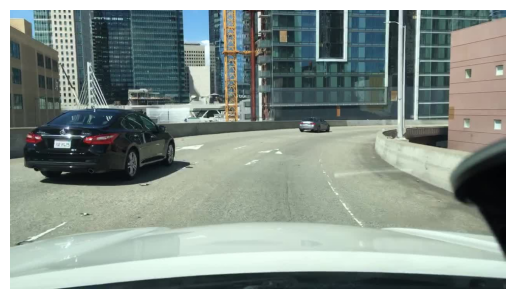

In [16]:
import matplotlib.pyplot as plt

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


0: 384x640 3 cars, 69.4ms
Speed: 15.0ms preprocess, 69.4ms inference, 391.3ms postprocess per image at shape (1, 3, 384, 640)


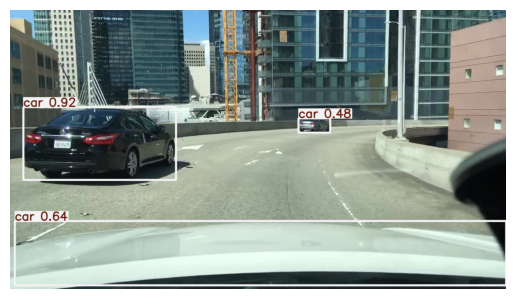

In [17]:
from ultralytics import YOLO

# Load YOLOv5 model
model = YOLO("yolov5s.pt")

# Run detection
results = model(image)

# Display results
plt.imshow(results[0].plot())
plt.axis("off")
plt.show()


100%|██████████| 6.25M/6.25M [00:00<00:00, 354MB/s]

0: 384x640 1 person, 2 cars, 1 bus, 42.3ms
Speed: 2.2ms preprocess, 42.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


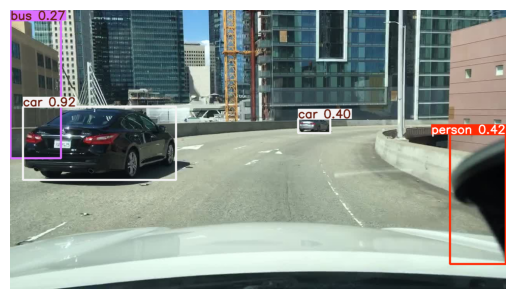

In [19]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")  # Smallest and fastest YOLO model

# Define image path
image_path = "dataset/10k/val/84d7e0cf-95b24c51.jpg"  # Change filename if needed

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run YOLOv8 object detection
results = model(image)

# Display the results
plt.imshow(results[0].plot())
plt.axis("off")
plt.show()


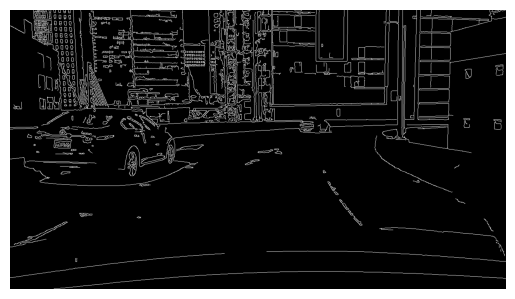

In [20]:
import numpy as np

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian Blur to remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Display edge-detected image
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.show()


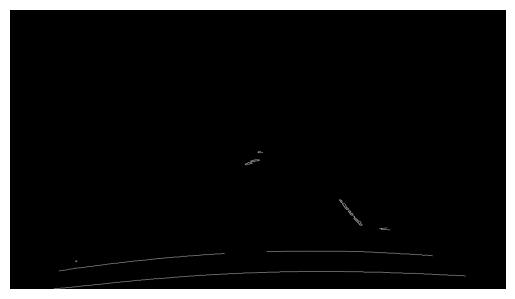

In [21]:
def region_of_interest(img):
    height, width = img.shape[:2]
    mask = np.zeros_like(img)

    # Define a triangular region (adjust based on your dataset)
    polygon = np.array([
        [(50, height), (width - 50, height), (width // 2, height // 2)]
    ])

    cv2.fillPoly(mask, polygon, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

roi = region_of_interest(edges)

# Show masked edges
plt.imshow(roi, cmap='gray')
plt.axis("off")
plt.show()


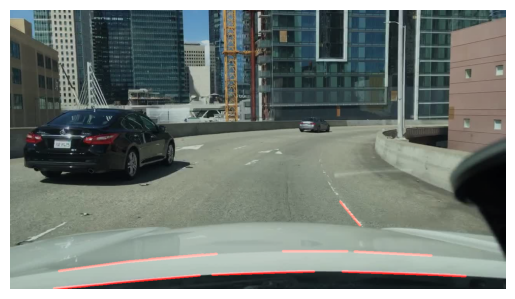

In [22]:
def detect_lines(img):
    lines = cv2.HoughLinesP(img, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=100)
    return lines

lines = detect_lines(roi)

# Draw lines on the image
line_image = np.zeros_like(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)  # Blue lines

# Overlay lines on the original image
output = cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Show detected lanes
plt.imshow(output)
plt.axis("off")
plt.show()
